In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 70
# pd.options.display.float_format = '{:20,.2f}'.format

import wrangle
import my_toolkit

- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Answer those questions through a mix of statistical tests and visualizations.

In [5]:
df, _, __ = wrangle.wrangle_zillow()

### Target Summary

In [6]:
my_toolkit.col_summary(df).sort_index()

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
age,int64,0,0.00,0,126,24477
bathroom_sum,float64,0,0.00,0,15,24588
bedroomcnt,int64,0,0.00,0,10,24593
calc_bath,float64,0,0.00,0,13,24590
fips,category,0,0.00,0,3,24600
fullbathcnt,int64,0,0.00,0,7,24596
heatingorsystemdesc,category,0,0.00,0,8,24595
latitude,float64,0,0.00,0,24178,425
logerror,float64,0,0.00,0,24522,81
longitude,float64,0,0.00,0,24253,350


In [7]:
TARGETS = ['logerror']

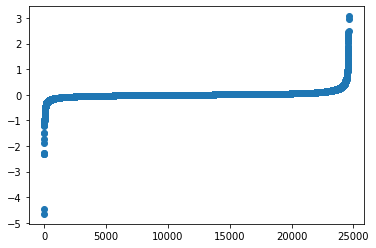

In [8]:
plt.scatter(range(len(df)), df.logerror.sort_values())


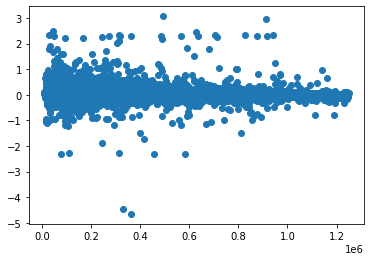

In [9]:
plt.scatter(df.tax, df.logerror)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00, 4.3000e+01,
        6.6600e+03, 1.7772e+04, 8.3000e+01, 2.0000e+01, 1.6000e+01]),
 array([-4.65542038, -3.88294185, -3.11046333, -2.33798481, -1.56550628,
        -0.79302776, -0.02054924,  0.75192928,  1.52440781,  2.29688633,
         3.06936485]),
 <BarContainer object of 10 artists>)

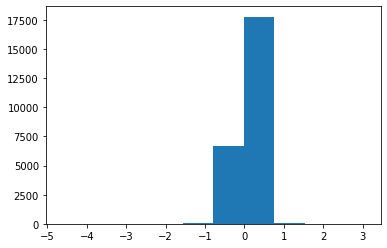

In [10]:
plt.hist(df.logerror)

### Making some auto-explore functions

In [11]:
def series_is_categorical(s):
    return s.dtype in ['object','category', 'bool']


In [12]:
series_is_categorical(df['tax'])

False

In [13]:
def get_cat_cols(df):
    cats = []
    for col in df:
        if series_is_categorical(df[col]):
            cats += [col]
    return cats

In [14]:
get_cat_cols(df)

['parcelid',
 'fips',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'taxdelinquencyflag',
 'heatingorsystemdesc']

In [15]:
TARGETS = ['logerror']
def explore_targets(df, targets=TARGETS):
    # Save ourselves some time on huge datasets
    if len(df) > 1_000:
        df = df.sample(1_000)

    cat_cols = []

    for col in df:
        print(col)
        if col not in targets:
            if series_is_categorical(df[col]):
                cat_cols.append(col)
                for target in targets:
                    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
                    fig.suptitle(f'{target} vs {col} (Categorical)')
                    # For readability, get a sorted list of each categorical bucket
                    sort_order = df[col].sort_values().unique().tolist()

                    plot1 = sns.barplot(data=df, x=col, y=target, ax=ax[0], order=sort_order)
                    plot1.set_ylabel(target)   
                    plot1.set_xlabel(None)  
                    # Rotate xtick labels so that they can't overlap each other as easily.
                    for item in plot1.get_xticklabels():
                        item.set_rotation(90)
                    
                    plot2 = sns.boxplot(data=df, x=col, y=target, ax=ax[1], order=sort_order)
                    plot2.set_ylabel(None)
                    plot2.set_xlabel(col)
                    for item in plot2.get_xticklabels():
                        item.set_rotation(90)
                    
                    plot3 = sns.violinplot(data=df, x=col, y=target, ax=ax[2], order=sort_order)
                    plot3.set_ylabel(None)
                    plot3.set_xlabel(None)
                    for item in plot3.get_xticklabels():
                        item.set_rotation(90)
                    fig
            else:
                for target in targets:
                    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
                    fig.suptitle(f'{target} vs {col} (Continous)')
                    # For readability, get a sorted list of each categorical bucket
                    sort_order = df[col].sort_values().unique().tolist()

                    plot1 = sns.scatterplot(data=df, x=col, y=target, ax=ax[0] )
                    plot1.set_ylabel(target)   
                    plot1.set_xlabel(None)  
                    # Rotate xtick labels so that they can't overlap each other as easily.
                    for item in plot1.get_xticklabels():
                        item.set_rotation(90)
                    
                    plot2 = sns.lineplot(data=df, x=col, y=target, ax=ax[1])
                    plot2.set_ylabel(None)
                    plot2.set_xlabel(col)
                    for item in plot2.get_xticklabels():
                        item.set_rotation(90)
                    
                    plot3 = sns.histplot(data=df, x=col, ax=ax[2])
                    plot3.set_ylabel(None)
                    plot3.set_xlabel(col)
                    for item in plot3.get_xticklabels():
                        item.set_rotation(90)
                    fig

In [17]:
len(df.columns.tolist())

24

parcelid
logerror
transactiondate
bedroomcnt
calc_bath
structure_sqft
fips
fullbathcnt
latitude
longitude
lot_sqft
regionidcity


c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


regionidzip
roomcnt
unitcnt
yearbuilt
tax_structure
tax
tax_land
taxdelinquencyflag
heatingorsystemdesc
years_tax_delinquent


C:\Users\Crux\AppData\Local\Temp\ipykernel_236\3123984997.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))


bathroom_sum
age


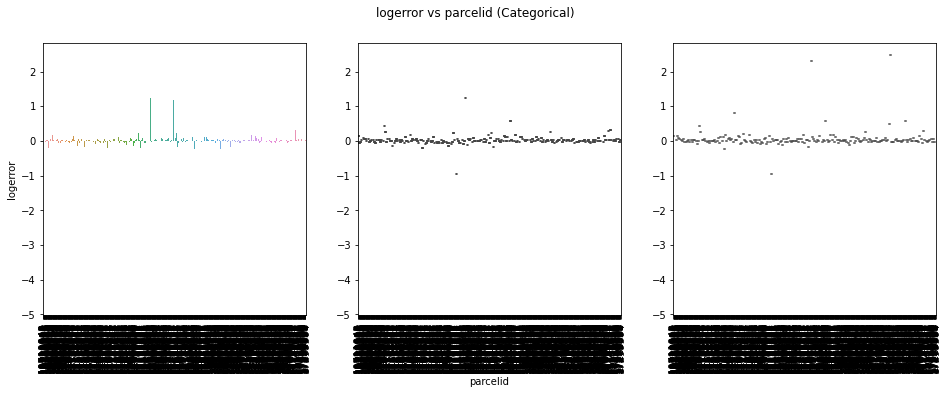

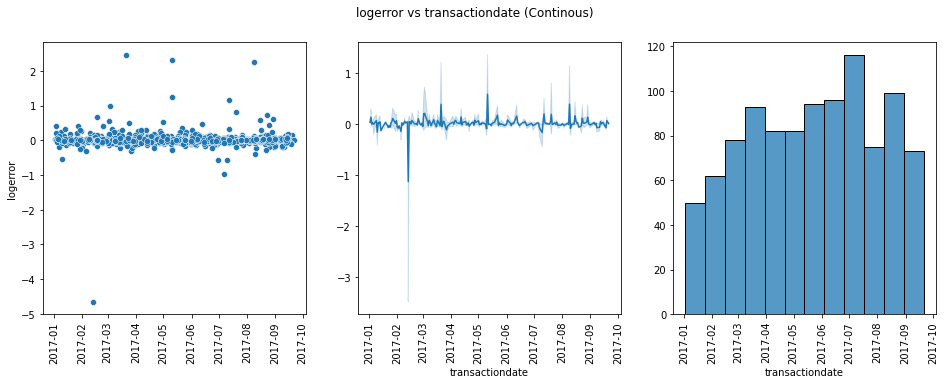

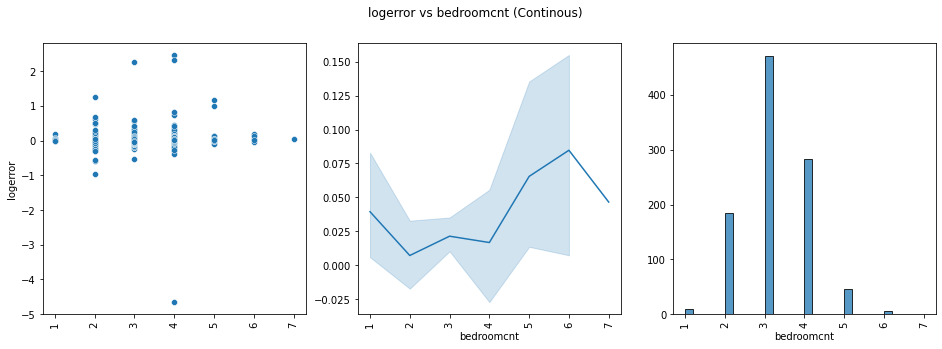

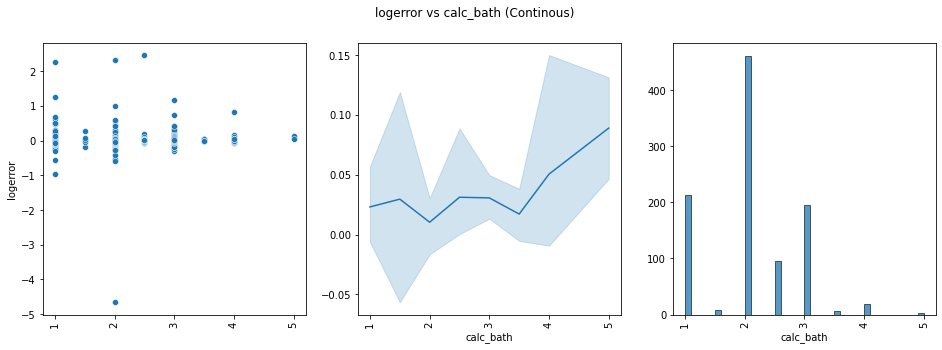

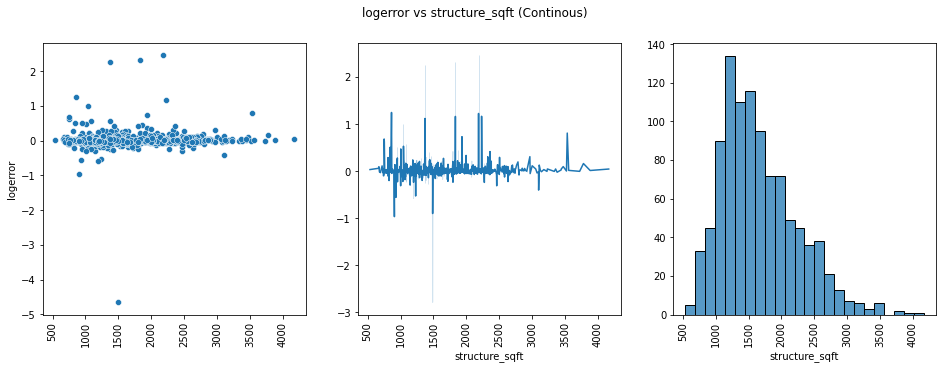

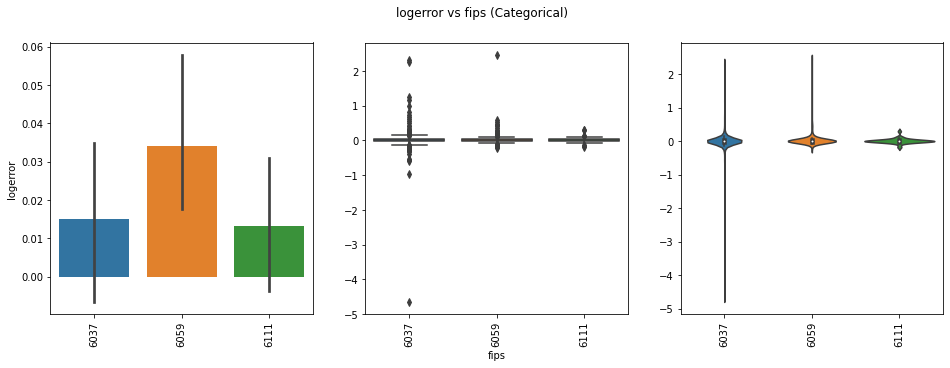

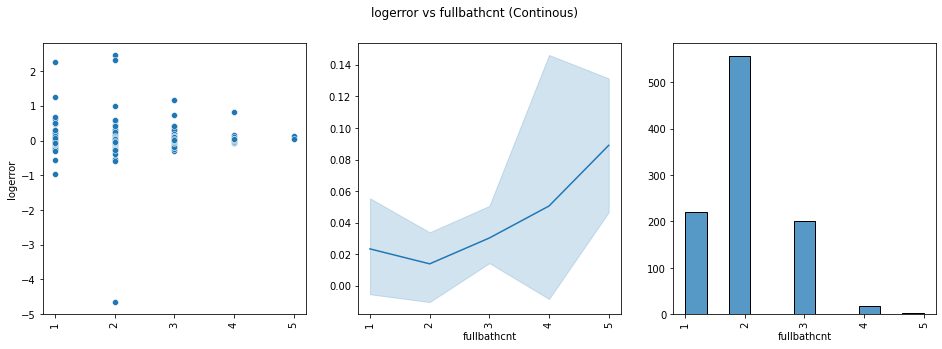

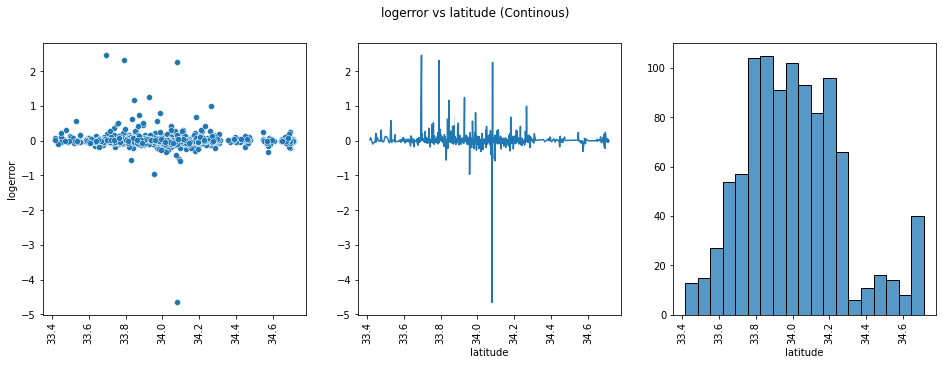

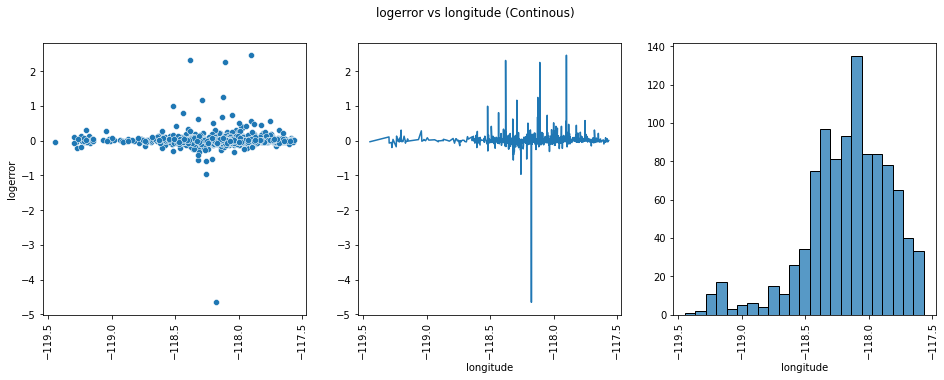

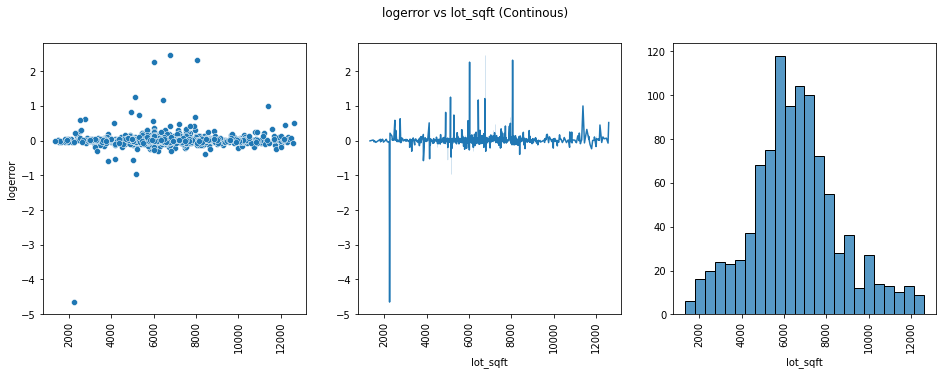

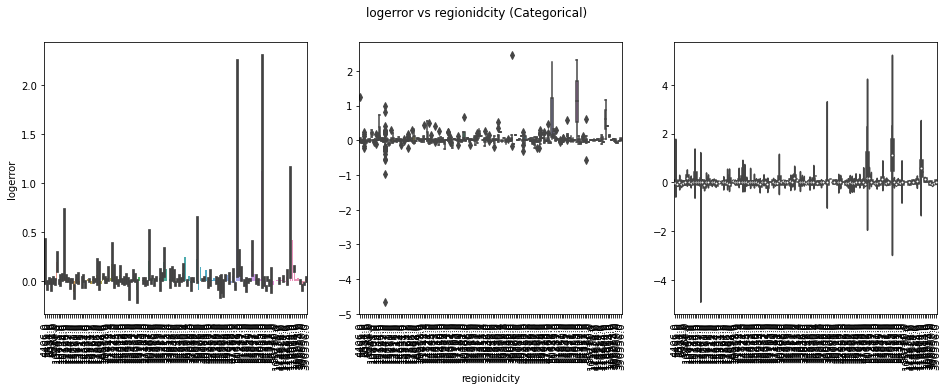

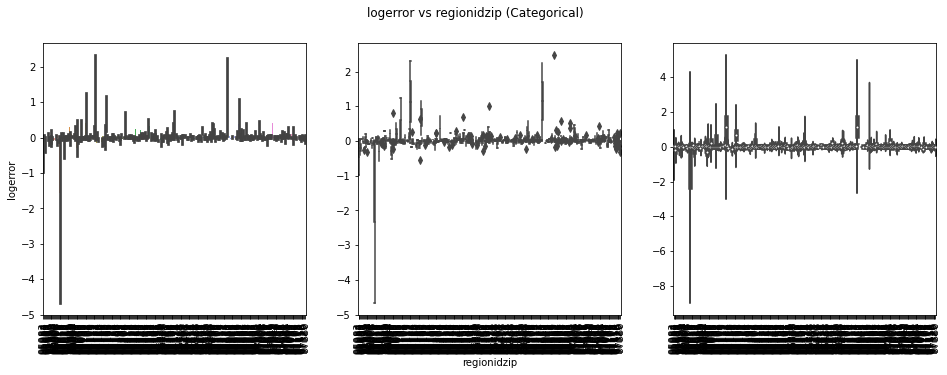

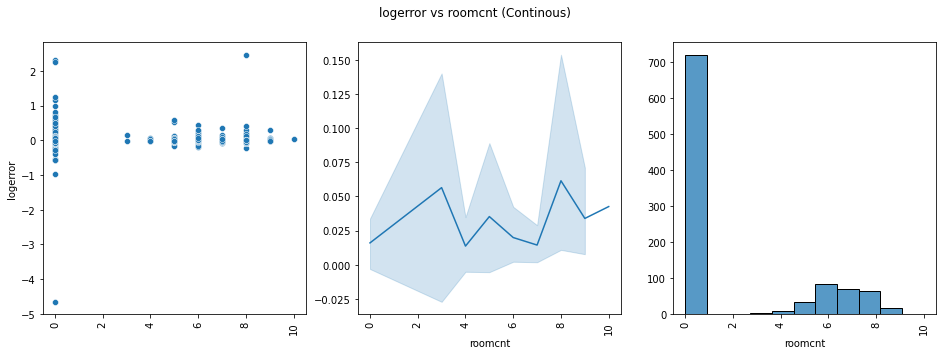

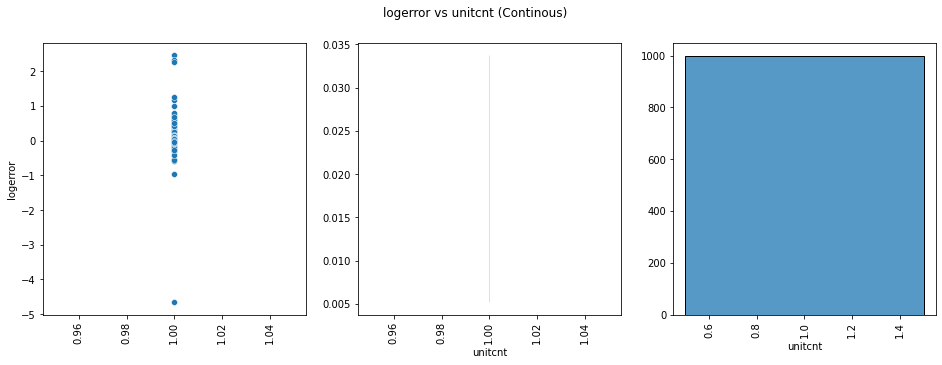

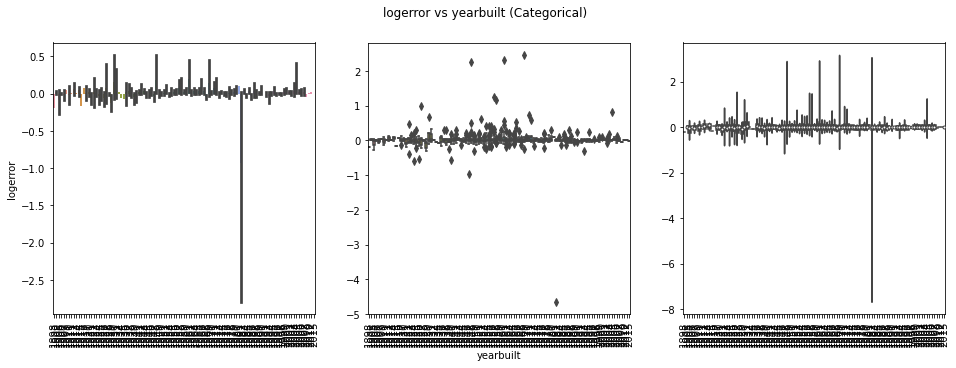

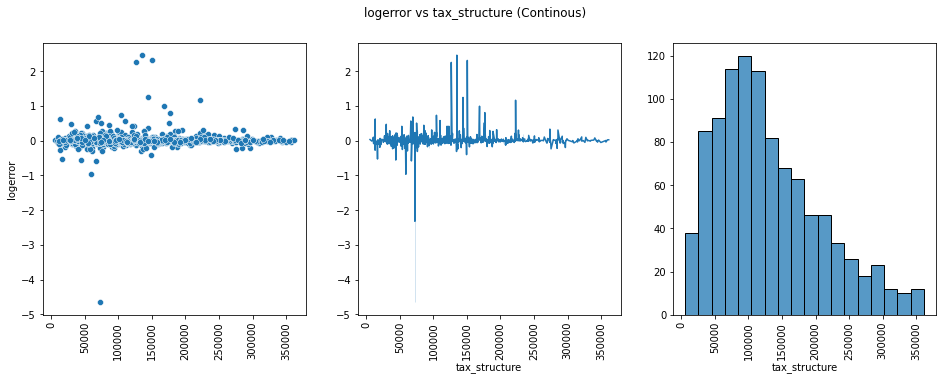

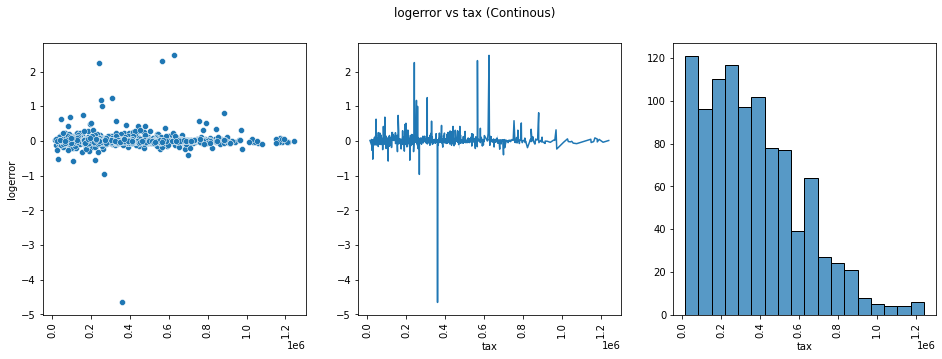

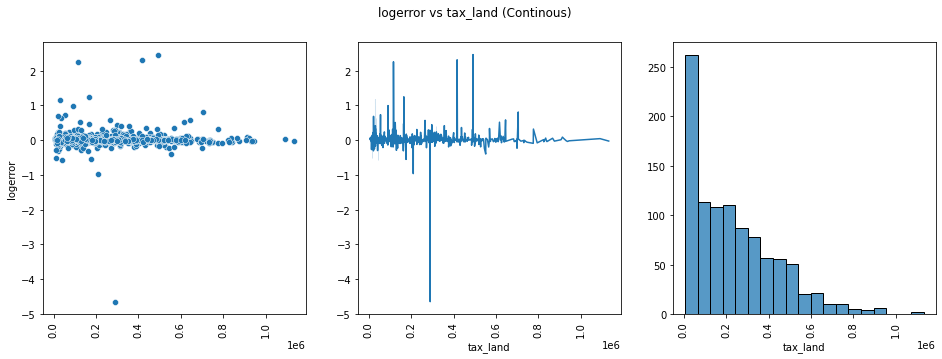

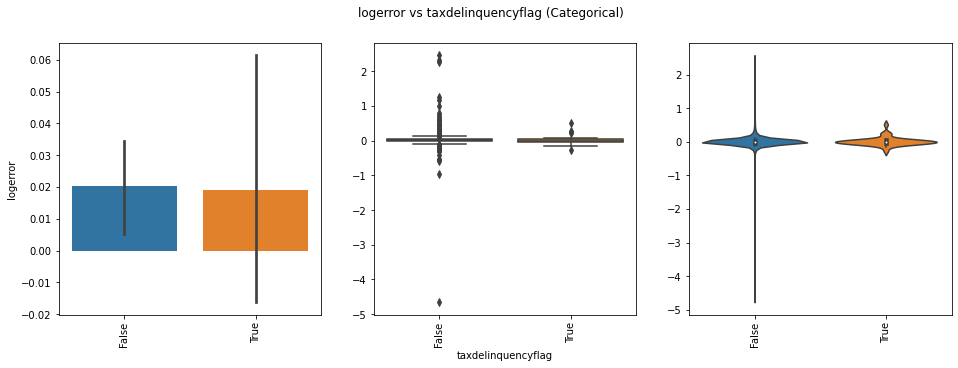

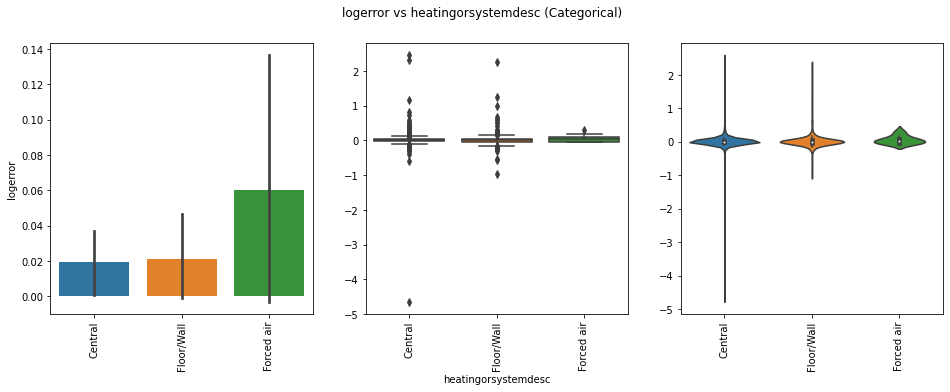

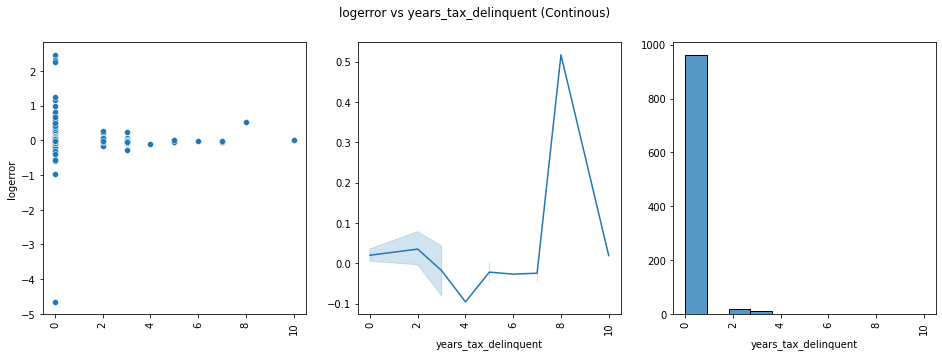

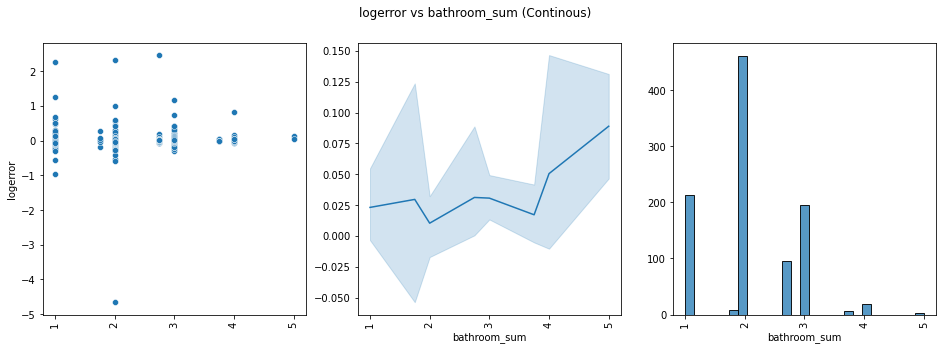

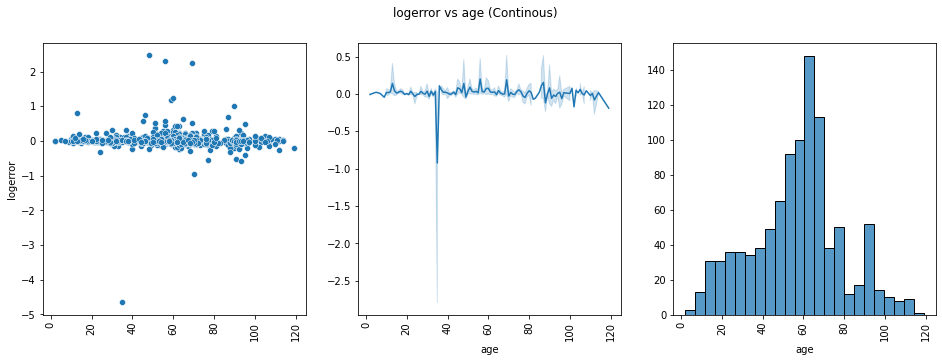

In [28]:
explore_targets(df)

In [20]:
get_cat_cols(df)

['parcelid',
 'fips',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'taxdelinquencyflag',
 'heatingorsystemdesc']

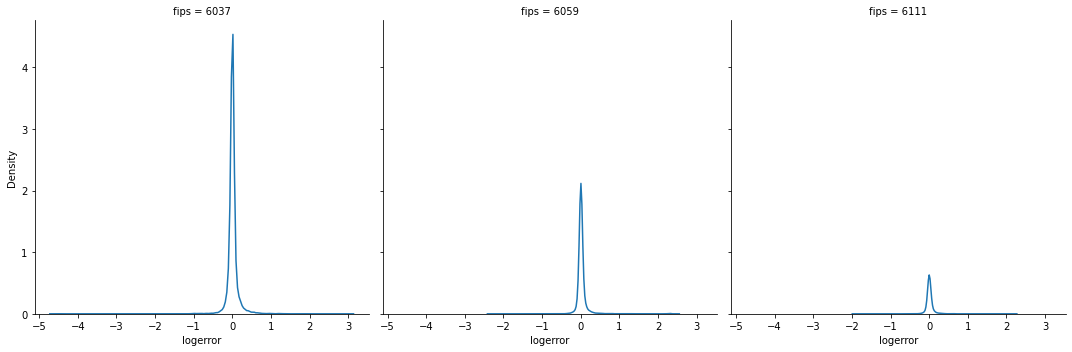

In [26]:
sns.displot(data=df, x='logerror', kind='kde', col='fips')


c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


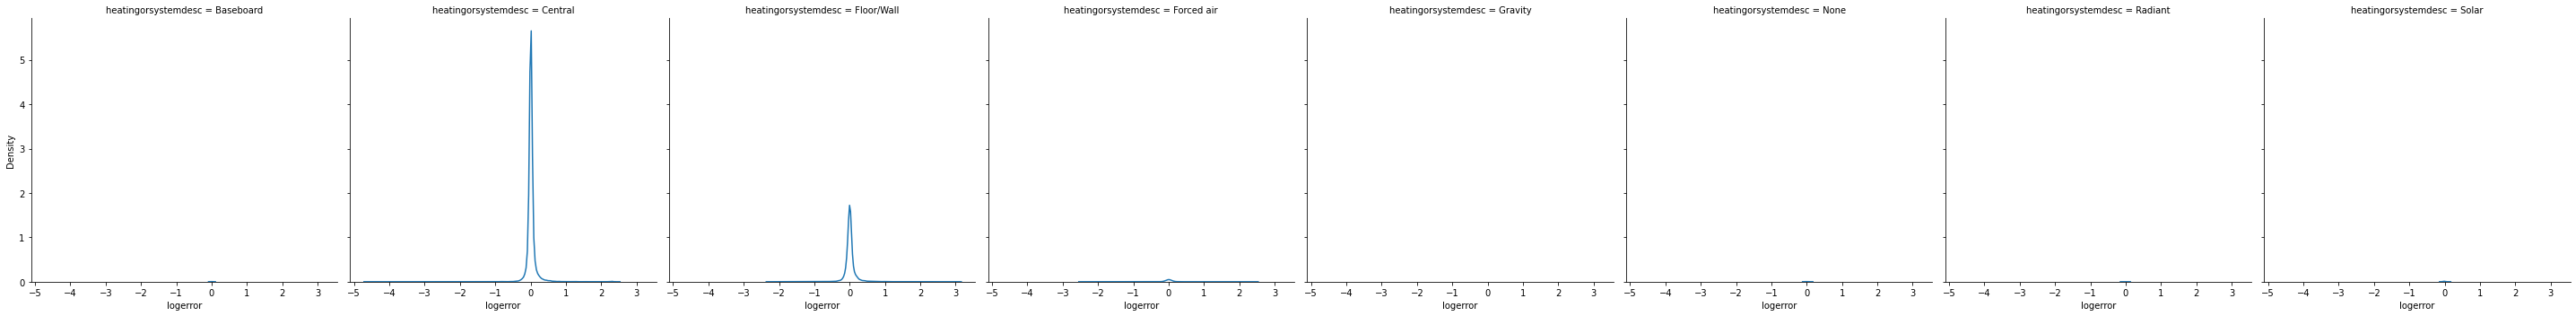

In [27]:
sns.displot(data=df, x='logerror', kind='kde', col='heatingorsystemdesc')


<AxesSubplot:>

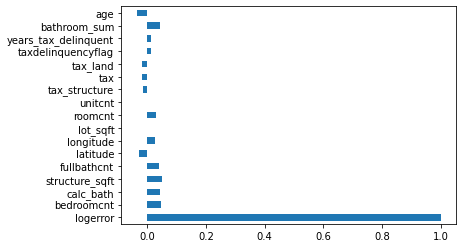

In [38]:
df.corr(method='spearman')['logerror'].plot.barh()


<AxesSubplot:>

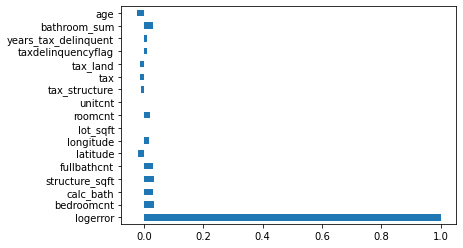

In [39]:
df.corr(method='kendall')['logerror'].plot.barh()

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression

import wrangle

def reshape_series(series):
    """For getting a 2D array from a pandas series. Useful for univariate models."""
    x = np.array(series)
    x = x.reshape((x.shape[0], 1))
    return x

def train_baseline_match_len(predictions):
    ybar = train.tax.mean()
    baseline = np.full_like(predictions, ybar)
    return baseline

train, test, validate = wrangle.wrangle_zillow()

x1 = reshape_series(train.structure_sqft)
y1 = train.tax_structure

x2 = reshape_series(train.age)
y2 = y1
poly = PolynomialFeatures(3, include_bias=False, interaction_only=False)
poly.fit(x2)
x2 = poly.transform(x2)

x3 = reshape_series(train.tax_structure)
y3 = train.tax


model1 = LinearRegression(positive=False)
model1.fit(x1, y1)

model2 = LinearRegression(positive=False)
model2.fit(x2, y2)

model3 = LinearRegression(positive=False)
model3.fit(x3,y3)

def ensemble_predict(xdf, m1=model1, m2=model2, poly=poly, m3=model3):
    p1 = m1.predict(reshape_series(xdf.structure_sqft))
    p2 = m2.predict(poly.transform(reshape_series(xdf.age)))
    p1p2 = (p1+p2)/2
    p1p2 = reshape_series(p1p2)
    p3 = m3.predict(p1p2)
    return p3

In [60]:
train['predicted_tax'] = ensemble_predict(train[['structure_sqft','age']])

<AxesSubplot:xlabel='tax', ylabel='logerror'>

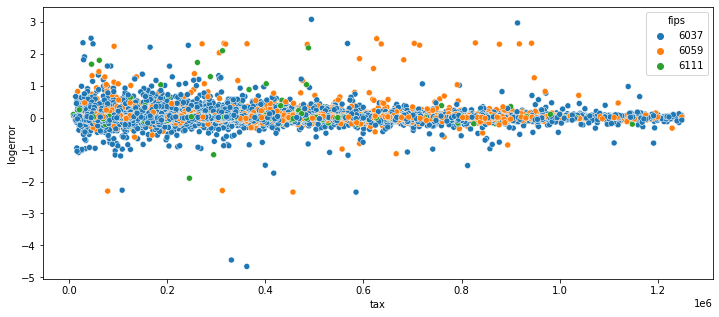

In [82]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train, x='tax', y='logerror', hue='fips')


<AxesSubplot:xlabel='predicted_tax', ylabel='logerror'>

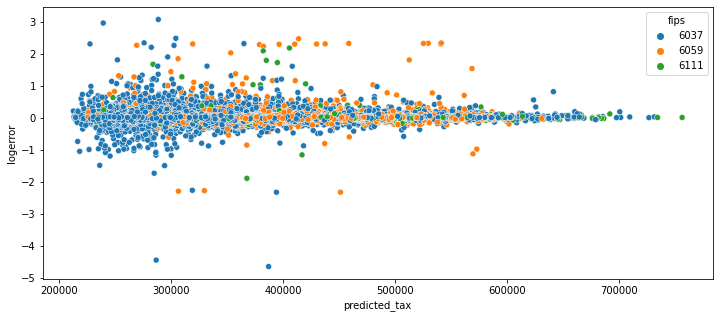

In [81]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train, x='predicted_tax', y='logerror', hue='fips')

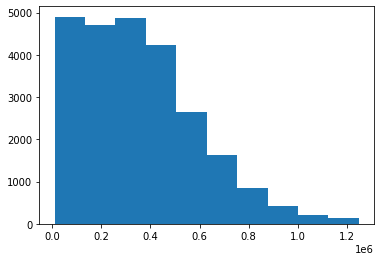

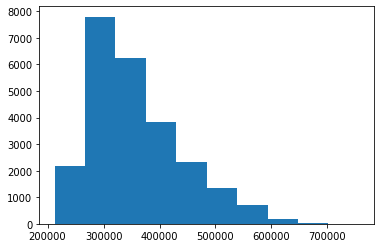

In [83]:
plt.hist(train.tax)
plt.show()
plt.hist(train.predicted_tax)
plt.show()

<AxesSubplot:xlabel='predicted_tax', ylabel='tax'>

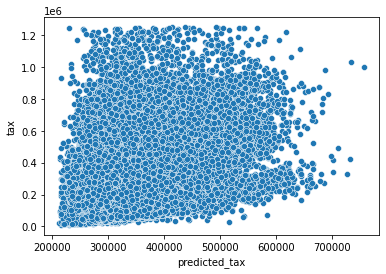

In [86]:
sns.scatterplot(data=train, x='predicted_tax', y='tax')